<a href="https://colab.research.google.com/github/CuongLeManh02/Learning-content/blob/main/identify_Vietnamese_currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Database/Money/

/content/drive/MyDrive/Colab Notebooks/Database/Money


In [8]:
train_img=('/content/drive/MyDrive/Colab Notebooks/Database/Money/Train')

In [9]:
valid_img=('/content/drive/MyDrive/Colab Notebooks/Database/Money/Val')

In [10]:
train_dg=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [11]:
valid_dg=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [14]:
train_money= train_dg.flow_from_directory(train_img,target_size=(200,200),class_mode='categorical')
valid_money= valid_dg.flow_from_directory(valid_img,target_size=(200,200),class_mode='categorical')

Found 120 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [15]:
x_train,y_train=next(train_money)

In [16]:
x_train.shape

(32, 200, 200, 3)

In [17]:
y_train.shape

(32, 6)

In [38]:
train_money.class_indices

{'10,000 Dong': 0,
 '100,000 Dong': 1,
 '20,000 Dong': 2,
 '200,000 Dong': 3,
 '50,000 Dong': 4,
 '500,000 Dong': 5}

In [36]:
label=['10,000 Dong','100,000 Dong','20,000 Dong','200,000 Dong','50,000 Dong','500,000 Dong']

In [21]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 128)     

In [22]:
model.compile(optimizer='Adam',loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_money,epochs=300,batch_size=128,verbose=1, validation_data=valid_money, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/300
4/4 [==============================] - 17s 5s/step - loss: 2.9189 - accuracy: 0.1417 - val_loss: 1.8073 - val_accuracy: 0.1667
Epoch 2/300
4/4 [==============================] - 2s 529ms/step - loss: 1.7718 - accuracy: 0.2167 - val_loss: 1.7660 - val_accuracy: 0.1667
Epoch 3/300
4/4 [==============================] - 2s 422ms/step - loss: 1.7311 - accuracy: 0.2583 - val_loss: 1.6313 - val_accuracy: 0.3333
Epoch 4/300
4/4 [==============================] - 2s 418ms/step - loss: 1.6607 - accuracy: 0.3250 - val_loss: 1.5084 - val_accuracy: 0.3667
Epoch 5/300
4/4 [==============================] - 2s 417ms/step - loss: 1.4898 - accuracy: 0.3583 - val_loss: 1.3112 - val_accuracy: 0.3667
Epoch 6/300
4/4 [==============================] - 2s 525ms/step - loss: 1.2950 - accuracy: 0.5750 - val_loss: 1.0787 - val_accuracy: 0.6333
Epoch 7/300
4/4 [==============================] - 2s 454ms/step - loss: 1.2999 - accuracy: 0.5333 - val_loss: 1.2175 - val_accuracy: 0.5000
Epoch 8/300
4/4

In [23]:
model.save('identify Vietnamese currency.h5')

In [24]:
metric = model.evaluate(x_train,y_train,verbose=2)
print('Loss:',metric[0])
print('Accuracy:',metric[1])

1/1 - 0s - loss: 0.0503 - accuracy: 1.0000 - 61ms/epoch - 61ms/step
Loss: 0.05031164735555649
Accuracy: 1.0


1/1 [==============================] - 0s 189ms/step
[[9.9680007e-01 3.7646238e-05 3.8432977e-06 9.0217945e-04 2.0441513e-03
  2.1199197e-04]]
1/1 [==============================] - 0s 18ms/step
This is: 10,000 Dong


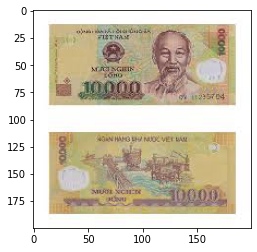

In [25]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Money/test/10 nghin27.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 20ms/step
[[2.2156073e-08 2.5669066e-03 3.7548492e-07 1.2376366e-01 3.7029819e-03
  8.6996609e-01]]
1/1 [==============================] - 0s 17ms/step
This is: 500,000 Dong


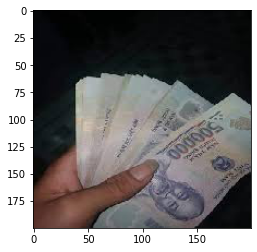

In [29]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Money/test/500 nghin28.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 18ms/step
[[1.04186565e-05 4.45947546e-04 3.93772162e-08 4.48765280e-03
  9.94591117e-01 4.64938494e-04]]
1/1 [==============================] - 0s 18ms/step
This is: 50,000 Dong


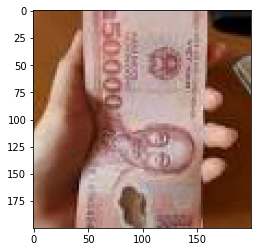

In [37]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Money/test/50 nghin28.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 34ms/step
[[4.4122672e-08 3.0245630e-07 3.3506597e-10 9.9464959e-01 1.6730772e-07
  5.3498410e-03]]
1/1 [==============================] - 0s 26ms/step
This is: 200,000 Dong


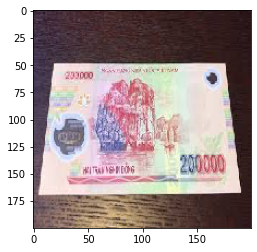

In [39]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Money/test/200 nghin29.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])